In [13]:
from __future__ import  absolute_import

# Setup detectron2 logger
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import os, cv2
import torch

import matplotlib.pyplot as plt

# import detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.video_visualizer import VideoVisualizer

In [4]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 28.2 MB/s eta 0:00:00:00:0100:01


In [2]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-ifsqqf0c
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-ifsqqf0c
  Resolved https://github.com/facebookresearch/detectron2.git to commit b7c7f4ba82192ff06f2bbb162b9f67b00ea55867
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 27.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.7/463.7 kB 8.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7

[04/05 14:31:22 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/R-50_RGB_60k.pth ...


/opt/conda/lib/python3.11/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


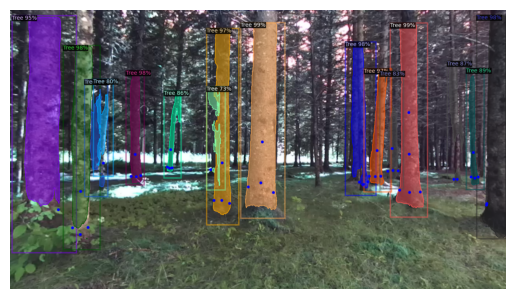

In [3]:



# local paths to model and image
# model_name = 'X-101_RGB_60k.pth'
model_name = 'R-50_RGB_60k.pth'
image_path = './output/image_00000_RGB.png'
'eastbound_20240319_212.png'

if __name__ == "__main__":
    torch.cuda.is_available()
    logger = setup_logger(name=__name__)
    
    # All configurables are listed in /repos/detectron2/detectron2/config/defaults.py        
    cfg = get_cfg()
    cfg.INPUT.MASK_FORMAT = "bitmask"
    # cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml"))
    # cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml"))
    cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
    cfg.DATASETS.TRAIN = ()
    cfg.DATASETS.TEST = ()
    cfg.DATALOADER.NUM_WORKERS = 8
    cfg.SOLVER.IMS_PER_BATCH = 8
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256   # faster (default: 512)
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (tree)
    cfg.MODEL.SEM_SEG_HEAD.NUM_CLASSES = 1  
    cfg.MODEL.ROI_KEYPOINT_HEAD.NUM_KEYPOINTS = 5
    cfg.MODEL.MASK_ON = True
    
    cfg.OUTPUT_DIR = './output'
    cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, model_name)
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
    # cfg.INPUT.MIN_SIZE_TEST = 0  # no resize at test time
    
    # set detector
    predictor_synth = DefaultPredictor(cfg)    
    
    # set metadata
    tree_metadata = MetadataCatalog.get("my_tree_dataset").set(thing_classes=["Tree"], keypoint_names=["kpCP", "kpL", "kpR", "AX1", "AX2"])
    
    # inference
    im = cv2.imread(image_path)
    outputs_pred = predictor_synth(im)
    v_synth = Visualizer(im[:, :, ::-1],
                    metadata=tree_metadata, 
                    scale=1,
    )
    out_synth = v_synth.draw_instance_predictions(outputs_pred["instances"].to("cpu"))



    import matplotlib.pyplot as plt

    # Assuming out_synth.get_image() returns the image
    image = out_synth.get_image()[:, :, ::-1]  # Assuming the image is in BGR format, converting it to RGB
    
    plt.imshow(image)
    plt.axis('off')  # Turn off axis
    plt.show()
    
    # cv2.imshow('predictions', out_synth.get_image()[:, :, ::-1])
    # k = cv2.waitKey(0)
    
    # cv2.destroyAllWindows()
    
        

[04/05 14:37:28 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/R-50_RGB_60k.pth ...


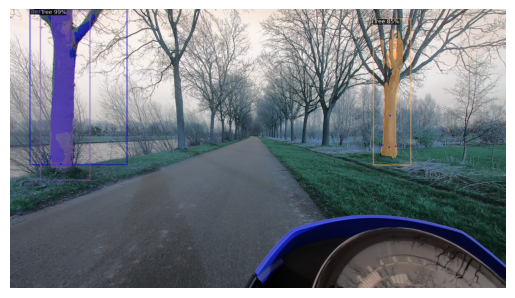

In [5]:



# local paths to model and image
# model_name = 'X-101_RGB_60k.pth'
model_name = 'R-50_RGB_60k.pth'
image_path = './output/eastbound_20240319_212.png'

if __name__ == "__main__":
    torch.cuda.is_available()
    logger = setup_logger(name=__name__)
    
    # All configurables are listed in /repos/detectron2/detectron2/config/defaults.py        
    cfg = get_cfg()
    cfg.INPUT.MASK_FORMAT = "bitmask"
    # cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml"))
    # cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml"))
    cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
    cfg.DATASETS.TRAIN = ()
    cfg.DATASETS.TEST = ()
    cfg.DATALOADER.NUM_WORKERS = 8
    cfg.SOLVER.IMS_PER_BATCH = 8
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256   # faster (default: 512)
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (tree)
    cfg.MODEL.SEM_SEG_HEAD.NUM_CLASSES = 1  
    cfg.MODEL.ROI_KEYPOINT_HEAD.NUM_KEYPOINTS = 5
    cfg.MODEL.MASK_ON = True
    
    cfg.OUTPUT_DIR = './output'
    cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, model_name)
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
    # cfg.INPUT.MIN_SIZE_TEST = 0  # no resize at test time
    
    # set detector
    predictor_synth = DefaultPredictor(cfg)    
    
    # set metadata
    tree_metadata = MetadataCatalog.get("my_tree_dataset").set(thing_classes=["Tree"], keypoint_names=["kpCP", "kpL", "kpR", "AX1", "AX2"])
    

    
    # inference
    im = cv2.imread(image_path)
    outputs_pred = predictor_synth(im)
    v_synth = Visualizer(im[:, :, ::-1],
                    metadata=tree_metadata, 
                    scale=1,
    )
    out_synth = v_synth.draw_instance_predictions(outputs_pred["instances"].to("cpu"))



    import matplotlib.pyplot as plt

    # Assuming out_synth.get_image() returns the image
    image = out_synth.get_image()[:, :, ::-1]  # Assuming the image is in BGR format, converting it to RGB
    
    plt.imshow(image)
    plt.axis('off')  # Turn off axis
    plt.show()
    
    # cv2.imshow('predictions', out_synth.get_image()[:, :, ::-1])
    # k = cv2.waitKey(0)
    
    # cv2.destroyAllWindows()

In [9]:
print(out_synth.get_keypoints())

AttributeError: 'VisImage' object has no attribute 'get_keypoints'

In [11]:


# List all attributes of VisImage
print(dir(out_synth))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_setup_figure', 'ax', 'canvas', 'dpi', 'fig', 'get_image', 'height', 'img', 'reset_image', 'save', 'scale', 'width']


In [ ]:
#  model and video variables
model_name = 'R-50_RGB_60k.pth'
# model_name = 'X-101_RGB_60k.pth'
video_path = './output/forest_walk_1min.mp4'

if __name__ == "__main__":
    torch.cuda.is_available()
    logger = setup_logger(name=__name__)
    
    # All configurables are listed in /repos/detectron2/detectron2/config/defaults.py        
    cfg = get_cfg()
    cfg.INPUT.MASK_FORMAT = "bitmask"
    # cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml"))
    # cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml"))
    cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
    cfg.DATASETS.TRAIN = ()
    cfg.DATASETS.TEST = ()
    cfg.DATALOADER.NUM_WORKERS = 8
    cfg.SOLVER.IMS_PER_BATCH = 8
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256   # faster (default: 512)
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (tree)
    cfg.MODEL.SEM_SEG_HEAD.NUM_CLASSES = 1  
    cfg.MODEL.ROI_KEYPOINT_HEAD.NUM_KEYPOINTS = 5
    cfg.MODEL.MASK_ON = True
    
    cfg.OUTPUT_DIR = './output' 
    cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, model_name)
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
    # cfg.INPUT.MIN_SIZE_TEST = 0  # no resize at test time
    
    # set detector
    predictor_synth = DefaultPredictor(cfg)    
    
    # set metadata
    tree_metadata = MetadataCatalog.get("my_tree_dataset").set(thing_classes=["Tree"], keypoint_names=["kpCP", "kpL", "kpR", "AX1", "AX2"])
            
    # Get one video frame 
    vcap = cv2.VideoCapture(video_path)
    
    # get vcap property 
    w = int(vcap.get(cv2.CAP_PROP_FRAME_WIDTH))
    h = int(vcap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(vcap.get(cv2.CAP_PROP_FPS))
    n_frames = int(vcap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # VIDEO recorder
    # Grab the stats from image1 to use for the resultant video
    # fourcc = cv2.VideoWriter_fourcc(*'mp4v')   
    # video = cv2.VideoWriter("pred_and_track_00.mp4",fourcc, 5, (w, h))  
    
    # Check if camera opened successfully
    if (vcap.isOpened()== False):
        print("Error opening video stream or file")
       
    vid_vis = VideoVisualizer(metadata=tree_metadata)
                                
    nframes = 0
    while(vcap.isOpened() ):
        ret, frame = vcap.read()
        # if frame is read correctly ret is True
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break
        y = 000
        # h = 800
        x = 000
        # w = 800
        crop_frame = frame[y:y+h, x:x+w]
        # cv2.imshow('frame', crop_frame)
        if cv2.waitKey(1) == ord('q'):
                break
        
        # 5 fps
        if nframes % 12 == 0:
            outputs_pred = predictor_synth(crop_frame)
            # v_synth = Visualizer(crop_frame[:, :, ::-1],
            #                     metadata=tree_metadata, 
            #                     scale=1, 
            #                     instance_mode =  ColorMode.IMAGE     # remove color from image, better see instances  
            #     )
            out = vid_vis.draw_instance_predictions(crop_frame, outputs_pred["instances"].to("cpu"))
                
            vid_frame = out.get_image()
            # video.write(vid_frame)
            # cv2.imshow('frame', vid_frame)

            # Assuming out_synth.get_image() returns the image
            image = out_synth.get_image()[:, :, ::-1]  # Assuming the image is in BGR format, converting it to RGB
            
            plt.imshow(vid_frame)
            plt.axis('off')  # Turn off axis
            plt.show()
            
        nframes += 1
    
    # video.release()
    vcap.release()
    # cv2.destroyAllWindows()